In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [12]:
train_dir = "cifar-10-img/train"
test_dir  = "cifar-10-img/test"

datagen = ImageDataGenerator(rescale=1./255)

# Use sparse labels (integers 0..9)
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='sparse',
    shuffle=True
)
test_generator = datagen.flow_from_directory(
    test_dir,
    target_size=(32, 32),
    batch_size=64,
    class_mode='sparse',
    shuffle=False
)

NUM_CLASSES = 10
# Derive CLASS_NAMES in correct order from the generator
idx_to_class = {v:k for k,v in train_generator.class_indices.items()}
CLASS_NAMES = [idx_to_class[i] for i in range(NUM_CLASSES)]
print("Class order:", CLASS_NAMES)

Found 40079 images belonging to 10 classes.
Found 9921 images belonging to 10 classes.
Class order: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


In [14]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation='relu',input_shape=(32,32,3)),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.MaxPooling2D(2,2),
    layers.Conv2D(64,(3,3),activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(NUM_CLASSES, activation='softmax')
])



In [15]:
model.compile(optimizer=keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

EPOCHS = 10
steps_per_epoch   = train_generator.samples // train_generator.batch_size
validation_steps  = test_generator.samples  // test_generator.batch_size

history = model.fit(
    train_generator,
    epochs=EPOCHS,
    steps_per_epoch=steps_per_epoch,
    validation_data=test_generator,
    validation_steps=validation_steps
)

Epoch 1/10


2025-11-07 08:30:05.604488: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


624/626 [============================>.] - ETA: 0s - loss: 1.8402 - accuracy: 0.3226

2025-11-07 08:30:15.879731: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


626/626 [==============================] - 12s 19ms/step - loss: 1.8390 - accuracy: 0.3231 - val_loss: 1.5143 - val_accuracy: 0.4478
Epoch 2/10
626/626 [==============================] - 11s 18ms/step - loss: 1.4137 - accuracy: 0.4901 - val_loss: 1.3019 - val_accuracy: 0.5382
Epoch 3/10
626/626 [==============================] - 11s 18ms/step - loss: 1.2195 - accuracy: 0.5640 - val_loss: 1.2352 - val_accuracy: 0.5616
Epoch 4/10
626/626 [==============================] - 11s 18ms/step - loss: 1.0819 - accuracy: 0.6160 - val_loss: 1.0735 - val_accuracy: 0.6261
Epoch 5/10
626/626 [==============================] - 11s 18ms/step - loss: 0.9792 - accuracy: 0.6569 - val_loss: 1.0332 - val_accuracy: 0.6395
Epoch 6/10
626/626 [==============================] - 11s 18ms/step - loss: 0.8973 - accuracy: 0.6833 - val_loss: 1.0067 - val_accuracy: 0.6529
Epoch 7/10
626/626 [==============================] - 11s 18ms/step - loss: 0.8279 - accuracy: 0.7096 - val_loss: 0.9985 - val_accuracy: 0.6593
Epo

In [16]:
test_loss, test_acc = model.evaluate(test_generator, verbose=0)
print(f"Final Test Loss: {test_loss:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

2025-11-07 08:32:02.696704: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


Final Test Loss: 0.9867
Final Test Accuracy: 0.6617


In [17]:
probs = model.predict(test_generator, verbose=0)
y_pred = np.argmax(probs, axis=1)
y_true = test_generator.classes  # integer labels in directory order

cm = tf.math.confusion_matrix(y_true, y_pred, num_classes=NUM_CLASSES)
print("\n--- Confusion Matrix ---\n", cm.numpy())

2025-11-07 08:32:07.471095: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]



--- Confusion Matrix ---
 [[661  16  86  28  31  15   2  12  97  38]
 [ 41 820  13  20  11   7   8  11  41  85]
 [ 45   2 643  69  76  90   8  22  16  11]
 [ 21   3 112 474  63 224  20  24  17  16]
 [ 16   4 139  66 617  76  18  48  13   4]
 [  2   4  84 177  38 611   6  43   2   8]
 [  8   3 123 110  64  54 621   9   9  12]
 [ 12   3  53  41  81 109   2 657   5  12]
 [ 69  26  21  24   7  14   3   6 767  18]
 [ 40 107  22  31  13  26   6  21  43 694]]


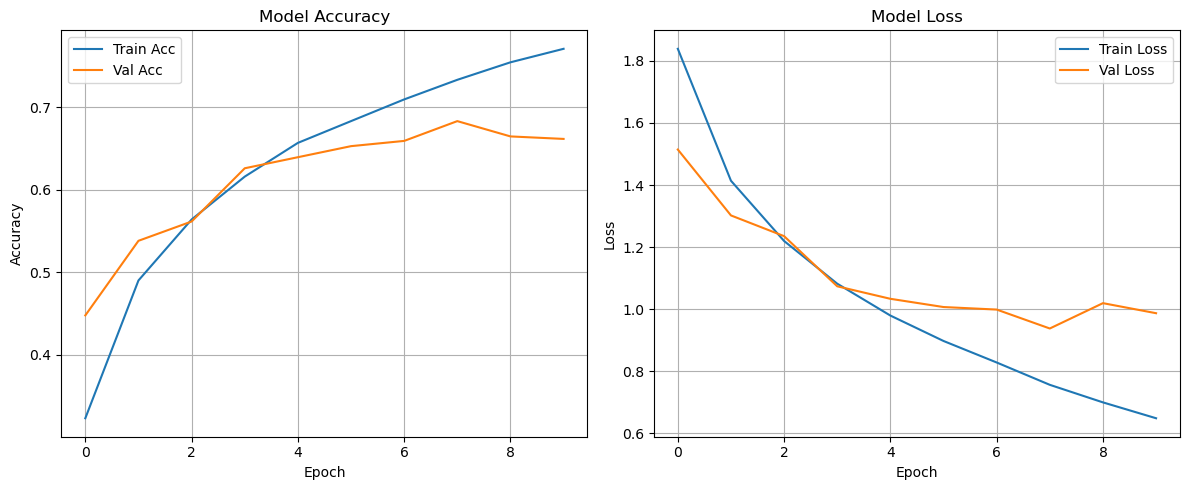

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy'); plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.legend(); plt.grid(True)

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss'); plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.legend(); plt.grid(True)
plt.tight_layout(); plt.show()

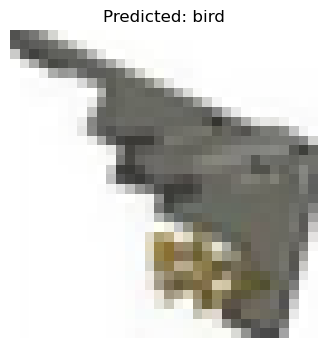

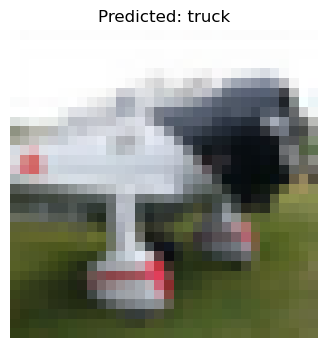

In [21]:
x_batch, y_batch = next(test_generator)
batch_probs = model.predict(x_batch, verbose=0)
for i in [0, min(10, len(x_batch)-1)]:
    plt.figure(figsize=(4,4))
    plt.imshow(x_batch[i])
    plt.title(f"Predicted: {CLASS_NAMES[np.argmax(batch_probs[i])]}")
    plt.axis('off'); plt.grid(False); plt.show()